In [3]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = 5000)

In [12]:
def read_review(review):
    word_index = imdb.get_word_index()
    index_word = {y:x for x,y in word_index.items()}
    return " ".join (index_word.get(idx-3,'?') for idx in review)

In [17]:
X_train = pad_sequences(X_train, 400)
X_test = pad_sequences(X_train, 400)

In [37]:
model = Sequential()
model.add(Embedding(5000,32,input_length = 400))
model.add(SimpleRNN(32,activation = 'tanh'))
model.add(Dense(1,activation = 'sigmoid'))

In [38]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
model.fit(X_train,y_train,epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.6525 - loss: 0.6134 - val_accuracy: 0.8042 - val_loss: 0.4517
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7818 - loss: 0.4766 - val_accuracy: 0.6872 - val_loss: 0.5772
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.7936 - loss: 0.4505 - val_accuracy: 0.8094 - val_loss: 0.4536
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5771s 9s/step - accuracy: 0.8537 - loss: 0.3386 - val_accuracy: 0.8108 - val_loss: 0.4436
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9223 - loss: 0.2069 - val_accuracy: 0.7326 - val_loss: 0.5534


In [27]:
y_preds = model.predict(X_test)
y_preds = np.where(y_preds>=0.5 , 1 , 0)

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step


In [28]:
import networkx as nx
G = nx.Graph()
G.add_node('Positive')
G.add_node('Negative')

for i in range (300):
    review_node = f"Review Node {i} "
    G.add_node(review_node)
    sentiment = 'Positive' if y_preds[i] == 1 else "Negative"
    G.add_edge(review_node,sentiment)

<function matplotlib.pyplot.show(close=None, block=None)>

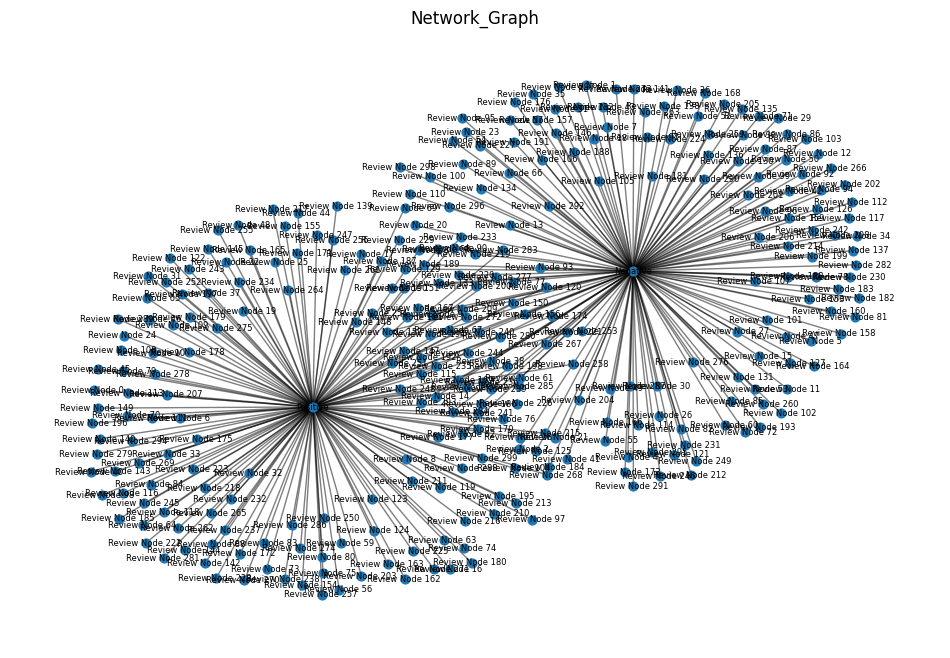

In [33]:
plt.figure(figsize=(12,8))
plt.title('Network_Graph')

pos = nx.spring_layout(G,k = 0.3)
nx.draw_networkx_nodes(G, pos, node_size = 40)
nx.draw_networkx_edges(G, pos, alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_size = 6)

plt.axis('off')
plt.show